# Data & Packages load


In [2]:
from utils import *

import numpy as np
import random

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU
from tensorflow.keras.layers import Dense, Bidirectional, Dropout, Flatten
from tensorflow.keras import optimizers
from keras.utils import normalize, to_categorical
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

%matplotlib inline

In [3]:
curves_path = "./curves_fitted.pkl"
curves_fitted = pd.read_pickle(curves_path)

In [4]:
curves_fitted

,Days,g,r,i,z,Type
1,"[-29.74899999999616, -28.497111111107287, -27....","[5.531199306097934, -3.8665451236341335, -9.09...","[-5.544486376867522, -4.709482399549891, -2.79...","[-15.182277989696436, -13.13455799092275, -10....","[3.8171593250531375, 3.935707265004988, 4.5488...",1
2,"[-16.43000000000029, -15.089373737374013, -13....","[19.66315915828518, 31.6905338352687, 39.13073...","[32.64839340425866, 48.97016797690984, 62.5255...","[50.981863491936814, 59.30934386543341, 66.584...","[38.827428772545275, 48.84930399986852, 57.658...",1
3,"[-23.222999999998137, -22.023444444442568, -20...","[-1.7347892300340444, 5.4949069428988375, 12.2...","[7.203010656397484, 8.196694077032229, 11.6106...","[13.580744335547342, 15.205316729248388, 18.45...","[-2.5300706611599826, 9.854371819881573, 21.13...",1
4,"[-27.98700000000099, -26.54528282828386, -25.1...","[4.715224926264313, 4.891896921441087, 1.83075...","[-0.10700397771756305, -1.9927960049973044, -1...","[3.5708403332400014, -2.053363612377228, -4.14...","[3.008084296204276, 0.29132922904481134, -0.97...",1
5,"[-25.65799999999581, -24.37505050504629, -23.0...","[-1.341309504711208, -8.943124259390503, -10.0...","[4.728928802254094, 4.647926951382842, 3.79554...","[7.61463211410692, 11.63412469759694, 9.785409...","[30.632079867543524, 26.20385722954056, 22.723...",1
...,...,...,...,...,...,...
199996,"[-27.437000000005355, -26.38815151515684, -25....","[8.29431358694477, 9.743137367500356, 11.04942...","[4.124846200513726, 3.808699694318282, 4.07861...","[1.1668327632622257, 2.39201266168775, 3.82135...","[6.622825994865473, 4.4936251672151615, 3.2323...",0
199997,"[-20.702000000004773, -20.07566666667139, -19....","[0.810357591777264, 5.348349126525441, 9.40002...","[4.535688525721003, 6.558562805693516, 8.54960...","[-6.508471874768616, -6.654916301120153, -6.52...","[6.9051457940187015, 2.785024191660798, -0.499...",0
199998,"[-26.980999999999767, -25.941101010100805, -24...","[-0.9271372489112032, 4.286748347100462, 9.317...","[-18.44563508369465, -10.038230355744448, -2.1...","[3.1026306328163757, 4.400256727234632, 6.4050...","[4.577443256576728, 7.884984235223436, 11.6322...",0
199999,"[-18.83299999999872, -17.755727272726052, -16....","[13.005091536153763, 21.387326722432036, 28.81...","[4.947744232592987, 12.577419604493262, 19.619...","[7.846916643129147, 14.002644069901704, 19.117...","[16.105118013759974, 17.682175052209182, 19.56...",0


In [5]:
curves_RNN = curves_fitted[['Days', 'g ', 'r ', 'i ', 'z ']].to_numpy().tolist()
types = curves_fitted.Type.to_numpy()

curves_RNN = np.reshape(curves_RNN, (curves_fitted.index.size, 100, 5))
types = types.reshape((-1, 1))

X_train, X_test, y_train, y_test = train_test_split(curves_RNN, types,
                                                    train_size=0.7,
                                                    random_state=42)

In [6]:
n_obs, seq_len, feat = X_train.shape
X_train.shape

(138824, 100, 5)

# Model: 1 layer & 1 neuron
---


## SimpleRNN

In [7]:
model_1l_1simpleRNN = Sequential()
model_1l_1simpleRNN.add(SimpleRNN(1, input_shape=(seq_len, feat),
                                  return_sequences=True, dropout=0.2))
model_1l_1simpleRNN.add(BatchNormalization())
model_1l_1simpleRNN.add(Flatten())
model_1l_1simpleRNN.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam()
model_1l_1simpleRNN.compile(loss='binary_crossentropy',
                            optimizer=optimizer,
                            metrics=['accuracy'])
model_1l_1simpleRNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100, 1)            7         
                                                                 
 batch_normalization (BatchN  (None, 100, 1)           4         
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 112
Trainable params: 110
Non-trainable params: 2
_________________________________________________________________


In [8]:
history_1l_1simpleRNN = model_1l_1simpleRNN.fit(X_train, y_train,
                                                validation_data=(X_test, y_test),
                                                epochs=30, batch_size=128)
predict_1l_1simpleRNN = model_1l_1simpleRNN.predict(X_test)

Epoch 1/30
1085/1085 [==============================] - 10s 8ms/step - loss: 0.6195 - accuracy: 0.6568 - val_loss: 0.5253 - val_accuracy: 0.7434
Epoch 2/30
1085/1085 [==============================] - 8s 8ms/step - loss: 0.5393 - accuracy: 0.7232 - val_loss: 0.5085 - val_accuracy: 0.7562
Epoch 3/30
1085/1085 [==============================] - 8s 8ms/step - loss: 0.5217 - accuracy: 0.7394 - val_loss: 0.4962 - val_accuracy: 0.7539
Epoch 4/30
1085/1085 [==============================] - 8s 8ms/step - loss: 0.4857 - accuracy: 0.7643 - val_loss: 0.4709 - val_accuracy: 0.7783
Epoch 5/30
1085/1085 [==============================] - 8s 8ms/step - loss: 0.4148 - accuracy: 0.8115 - val_loss: 0.4068 - val_accuracy: 0.8242
Epoch 6/30
1085/1085 [==============================] - 8s 8ms/step - loss: 0.3097 - accuracy: 0.8712 - val_loss: 0.2561 - val_accuracy: 0.8974
Epoch 7/30
1085/1085 [==============================] - 8s 8ms/step - loss: 0.2705 - accuracy: 0.8926 - val_loss: 0.2665 - val_accuracy

<AxesSubplot:>

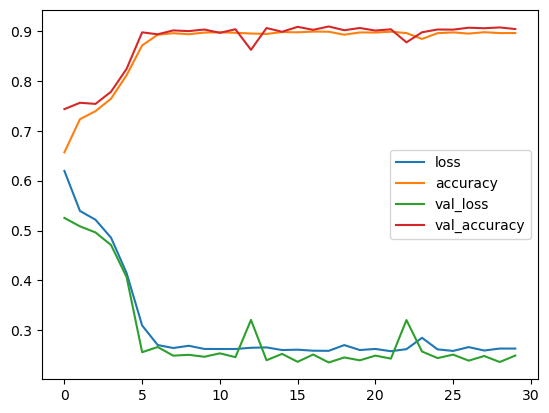

In [9]:
pd.DataFrame(history_1l_1simpleRNN.history).plot()

Normalized confusion matrix


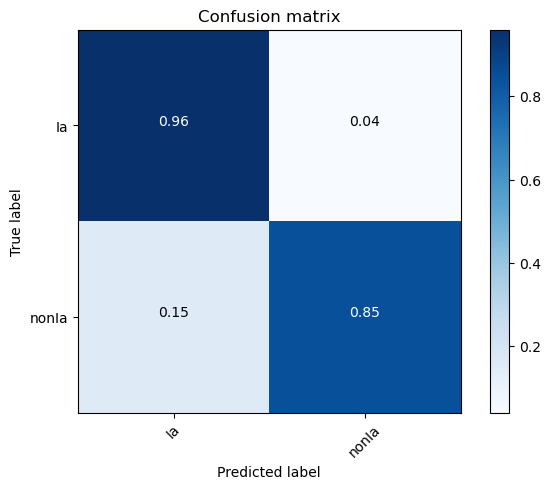

In [10]:
plot_confusion_matrix(y_test, predict_1l_1simpleRNN.round(), ['Ia', 'nonIa'], normalize=True)

AUC = 0.9041609438819458


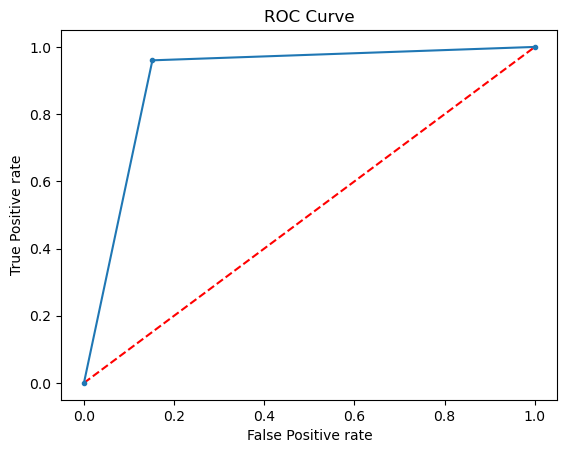

In [11]:
plot_roc_curve(y_test, predict_1l_1simpleRNN.round(), auc_print=True)

In [12]:
acc_1l_1simpleRNN = model_1l_1simpleRNN.evaluate(X_test, y_test, verbose=0)
print(f'accuracy: {acc_1l_1simpleRNN[1] * 100 : 0.2f}%')

accuracy:  90.40%


## LSTM

In [13]:
model_1l_1LSTM = Sequential()
model_1l_1LSTM.add(LSTM(1, input_shape=(seq_len, feat),
                        return_sequences=True, dropout=0.2))
model_1l_1LSTM.add(BatchNormalization())
model_1l_1LSTM.add(Flatten())
model_1l_1LSTM.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam()
model_1l_1LSTM.compile(loss='binary_crossentropy',
                       optimizer=optimizer,
                       metrics=['accuracy'])
model_1l_1LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 1)            28        
                                                                 
 batch_normalization_1 (Batc  (None, 100, 1)           4         
 hNormalization)                                                 
                                                                 
 flatten_1 (Flatten)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 133
Trainable params: 131
Non-trainable params: 2
_________________________________________________________________


In [14]:
history_1l_1LSTM = model_1l_1LSTM.fit(X_train, y_train,
                                     validation_data=(X_test, y_test),
                                     epochs=30, batch_size=128)
predict_1l_1LSTM = model_1l_1LSTM.predict(X_test)

Epoch 1/30
1085/1085 [==============================] - 20s 17ms/step - loss: 0.6181 - accuracy: 0.6619 - val_loss: 0.6079 - val_accuracy: 0.6711
Epoch 2/30
1085/1085 [==============================] - 21s 20ms/step - loss: 0.5008 - accuracy: 0.7580 - val_loss: 0.4941 - val_accuracy: 0.7712
Epoch 3/30
1085/1085 [==============================] - 22s 20ms/step - loss: 0.4154 - accuracy: 0.8199 - val_loss: 0.3265 - val_accuracy: 0.8751
Epoch 4/30
1085/1085 [==============================] - 20s 19ms/step - loss: 0.3873 - accuracy: 0.8416 - val_loss: 0.3259 - val_accuracy: 0.8826
Epoch 5/30
1085/1085 [==============================] - 20s 19ms/step - loss: 0.3809 - accuracy: 0.8457 - val_loss: 0.3219 - val_accuracy: 0.8864
Epoch 6/30
1085/1085 [==============================] - 21s 19ms/step - loss: 0.3770 - accuracy: 0.8490 - val_loss: 0.3175 - val_accuracy: 0.8884
Epoch 7/30
1085/1085 [==============================] - 21s 19ms/step - loss: 0.3723 - accuracy: 0.8515 - val_loss: 0.3243 -

<AxesSubplot:>

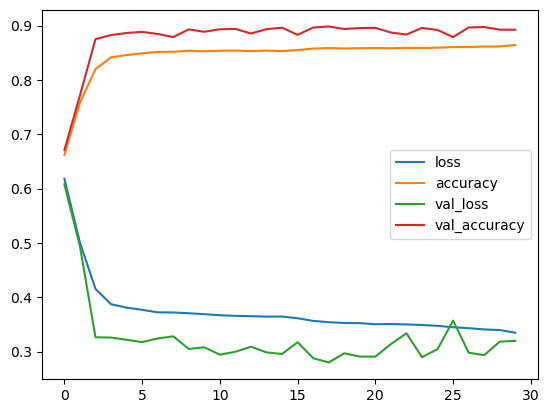

In [16]:
pd.DataFrame(history_1l_1LSTM.history).plot()

Normalized confusion matrix


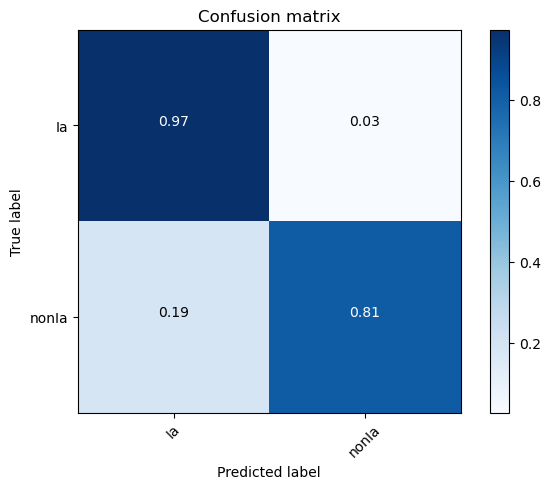

In [17]:
plot_confusion_matrix(y_test, predict_1l_1LSTM.round(), ['Ia', 'nonIa'], normalize=True)

AUC = 0.8925519446538065


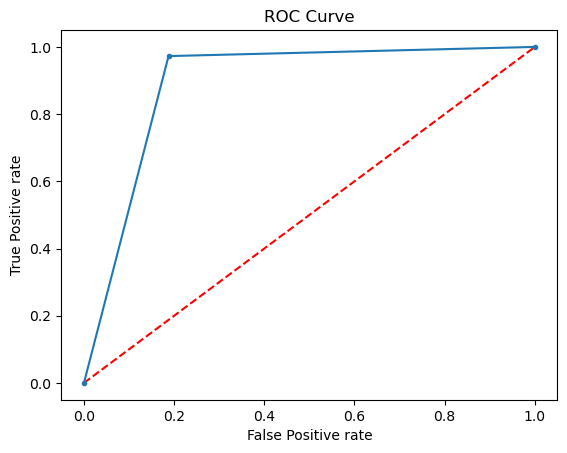

In [18]:
plot_roc_curve(y_test, predict_1l_1LSTM.round(), auc_print=True)

In [19]:
acc_1l_1LSTM = model_1l_1LSTM.evaluate(X_test, y_test, verbose=0)
print(f'accuracy: {acc_1l_1LSTM[1] * 100 : 0.2f}%')

accuracy:  89.23%


## GRU

In [20]:
model_1l_1GRU = Sequential()
model_1l_1GRU.add(GRU(1, input_shape=(seq_len, feat),
                      return_sequences=True, dropout=0.2))
model_1l_1GRU.add(BatchNormalization())
model_1l_1GRU.add(Flatten())
model_1l_1GRU.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam()
model_1l_1GRU.compile(loss='binary_crossentropy',
                      optimizer=optimizer,
                      metrics=['accuracy'])
model_1l_1GRU.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100, 1)            24        
                                                                 
 batch_normalization_2 (Batc  (None, 100, 1)           4         
 hNormalization)                                                 
                                                                 
 flatten_2 (Flatten)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 129
Trainable params: 127
Non-trainable params: 2
_________________________________________________________________


In [21]:
history_1l_1GRU = model_1l_1GRU.fit(X_train, y_train,
                                   validation_data=(X_test, y_test),
                                   epochs=30, batch_size=128)
predict_1l_1GRU = model_1l_1GRU.predict(X_test)

Epoch 1/30
1085/1085 [==============================] - 20s 17ms/step - loss: 0.6205 - accuracy: 0.6550 - val_loss: 0.7077 - val_accuracy: 0.4959
Epoch 2/30
1085/1085 [==============================] - 19s 17ms/step - loss: 0.5299 - accuracy: 0.7382 - val_loss: 0.7670 - val_accuracy: 0.5009
Epoch 3/30
1085/1085 [==============================] - 24s 22ms/step - loss: 0.4994 - accuracy: 0.7626 - val_loss: 0.9545 - val_accuracy: 0.5013
Epoch 4/30
1085/1085 [==============================] - 23s 22ms/step - loss: 0.4758 - accuracy: 0.7768 - val_loss: 1.0163 - val_accuracy: 0.5013
Epoch 5/30
1085/1085 [==============================] - 23s 22ms/step - loss: 0.4478 - accuracy: 0.7955 - val_loss: 0.8317 - val_accuracy: 0.5001
Epoch 6/30
1085/1085 [==============================] - 23s 22ms/step - loss: 0.4196 - accuracy: 0.8144 - val_loss: 0.9330 - val_accuracy: 0.5012
Epoch 7/30
1085/1085 [==============================] - 23s 21ms/step - loss: 0.4049 - accuracy: 0.8225 - val_loss: 0.8232 -

<AxesSubplot:>

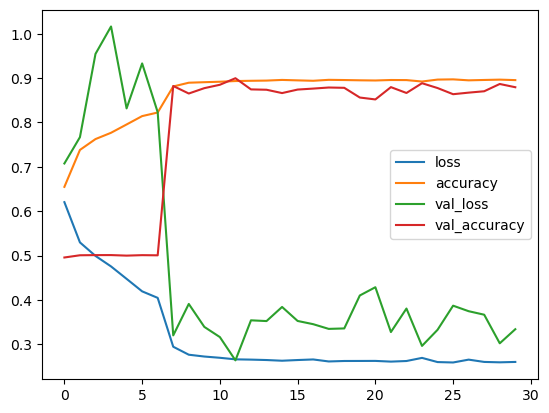

In [22]:
pd.DataFrame(history_1l_1GRU.history).plot()

Normalized confusion matrix


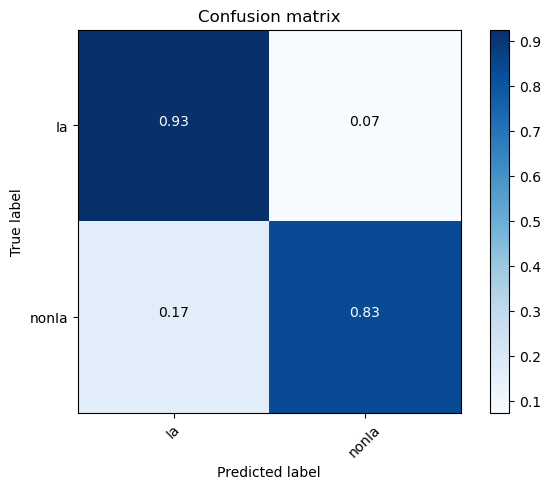

In [23]:
plot_confusion_matrix(y_test, predict_1l_1GRU.round(), ['Ia', 'nonIa'], normalize=True)

AUC = 0.8795586785665507


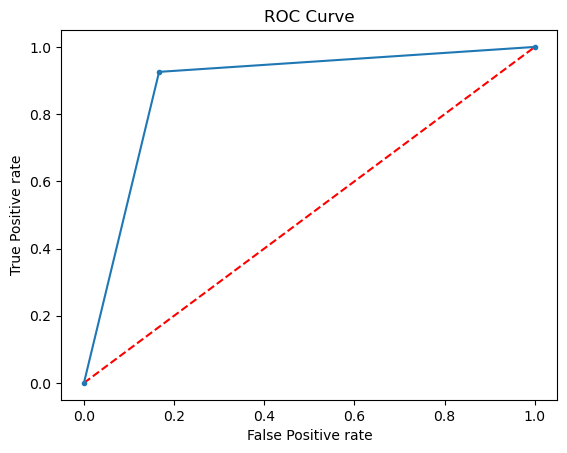

In [24]:
plot_roc_curve(y_test, predict_1l_1GRU.round(), auc_print=True)

In [25]:
acc_1l_1GRU = model_1l_1GRU.evaluate(X_test, y_test, verbose=0)
print(f'accuracy: {acc_1l_1GRU[1] * 100 : 0.2f}%')

accuracy:  87.94%


## Results

- SimpleRNN: slow train
- LSTM & GRU: accurate considering only 1 neuron
  - LSTM:
    - 98% Ia - 94% NonIa 
    - work better with default _lr_ ~_lr = 1e-3_~
  - GRU:
    - 94% Ia - 88% NonIa 
    - work better with default _lr_ ~_lr = 5e-4_~

# Model: 1 bidirectional layer & 1 neuron
---

## LSTM

In [26]:
model_1bl_1LSTM = Sequential()
model_1bl_1LSTM.add(Bidirectional(LSTM(1, return_sequences=True, dropout=0.2),
                                  input_shape=(seq_len, feat)))
model_1bl_1LSTM.add(BatchNormalization())
model_1bl_1LSTM.add(Flatten())
model_1bl_1LSTM.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam()
model_1bl_1LSTM.compile(loss='binary_crossentropy',
                       optimizer=optimizer,
                       metrics=['accuracy'])
model_1bl_1LSTM.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 100, 2)           56        
 l)                                                              
                                                                 
 batch_normalization_3 (Batc  (None, 100, 2)           8         
 hNormalization)                                                 
                                                                 
 flatten_3 (Flatten)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 265
Trainable params: 261
Non-trainable params: 4
_________________________________________________________________


In [27]:
history_1bl_1LSTM = model_1bl_1LSTM.fit(X_train, y_train,
                                     validation_data=(X_test, y_test),
                                     epochs=30, batch_size=128)
predict_1bl_1LSTM = model_1bl_1LSTM.predict(X_test)

Epoch 1/30
1085/1085 [==============================] - 22s 18ms/step - loss: 0.5529 - accuracy: 0.7079 - val_loss: 0.3937 - val_accuracy: 0.8319
Epoch 2/30
1085/1085 [==============================] - 20s 19ms/step - loss: 0.3003 - accuracy: 0.8746 - val_loss: 0.2328 - val_accuracy: 0.9073
Epoch 3/30
1085/1085 [==============================] - 24s 22ms/step - loss: 0.1807 - accuracy: 0.9335 - val_loss: 0.1512 - val_accuracy: 0.9471
Epoch 4/30
1085/1085 [==============================] - 24s 22ms/step - loss: 0.1607 - accuracy: 0.9435 - val_loss: 0.1487 - val_accuracy: 0.9493
Epoch 5/30
1085/1085 [==============================] - 24s 22ms/step - loss: 0.1553 - accuracy: 0.9456 - val_loss: 0.1624 - val_accuracy: 0.9423
Epoch 6/30
1085/1085 [==============================] - 24s 22ms/step - loss: 0.1519 - accuracy: 0.9469 - val_loss: 0.1667 - val_accuracy: 0.9456
Epoch 7/30
1085/1085 [==============================] - 24s 22ms/step - loss: 0.1487 - accuracy: 0.9485 - val_loss: 0.1495 -

<AxesSubplot:>

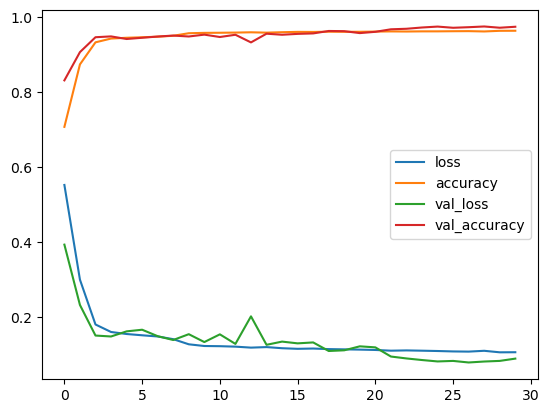

In [28]:
pd.DataFrame(history_1bl_1LSTM.history).plot()

Normalized confusion matrix


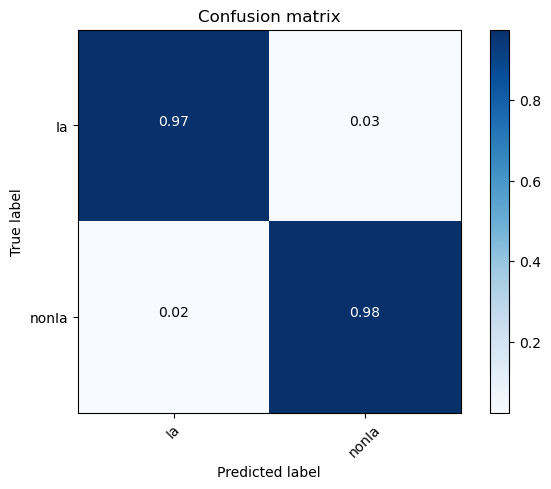

In [29]:
plot_confusion_matrix(y_test, predict_1bl_1LSTM.round(), ['Ia', 'nonIa'], normalize=True)

AUC = 0.97498898741876


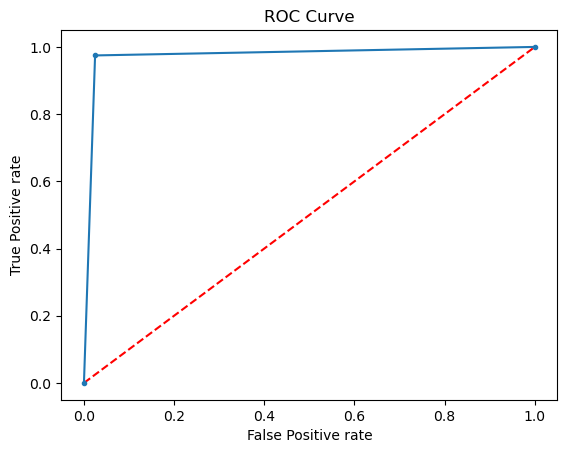

In [30]:
plot_roc_curve(y_test, predict_1bl_1LSTM.round(), auc_print=True)

In [31]:
acc_1bl_1LSTM = model_1bl_1LSTM.evaluate(X_test, y_test, verbose=0)
print(f'accuracy: {acc_1bl_1LSTM[1] * 100 : 0.2f}%')

accuracy:  97.50%


## GRU

In [32]:
model_1bl_1GRU = Sequential()
model_1bl_1GRU.add(Bidirectional(GRU(1, return_sequences=True, dropout=0.2),
                                 input_shape=(seq_len, feat)))
model_1bl_1GRU.add(BatchNormalization())
model_1bl_1GRU.add(Flatten())
model_1bl_1GRU.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam()
model_1bl_1GRU.compile(loss='binary_crossentropy',
                      optimizer=optimizer,
                      metrics=['accuracy'])
model_1bl_1GRU.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 100, 2)           48        
 nal)                                                            
                                                                 
 batch_normalization_4 (Batc  (None, 100, 2)           8         
 hNormalization)                                                 
                                                                 
 flatten_4 (Flatten)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                                 
Total params: 257
Trainable params: 253
Non-trainable params: 4
_________________________________________________________________


In [33]:
history_1bl_1GRU = model_1bl_1GRU.fit(X_train, y_train,
                                      validation_data=(X_test, y_test),
                                      epochs=30, batch_size=128)
predict_1bl_1GRU = model_1bl_1GRU.predict(X_test)

Epoch 1/30
1085/1085 [==============================] - 29s 25ms/step - loss: 0.4816 - accuracy: 0.7727 - val_loss: 0.4646 - val_accuracy: 0.8004
Epoch 2/30
1085/1085 [==============================] - 26s 24ms/step - loss: 0.3854 - accuracy: 0.8346 - val_loss: 0.2609 - val_accuracy: 0.9050
Epoch 3/30
1085/1085 [==============================] - 26s 24ms/step - loss: 0.3347 - accuracy: 0.8632 - val_loss: 0.2364 - val_accuracy: 0.9107
Epoch 4/30
1085/1085 [==============================] - 27s 24ms/step - loss: 0.3098 - accuracy: 0.8740 - val_loss: 0.2267 - val_accuracy: 0.9120
Epoch 5/30
1085/1085 [==============================] - 27s 25ms/step - loss: 0.2982 - accuracy: 0.8779 - val_loss: 0.2729 - val_accuracy: 0.8816
Epoch 6/30
1085/1085 [==============================] - 27s 25ms/step - loss: 0.2885 - accuracy: 0.8819 - val_loss: 0.3033 - val_accuracy: 0.8663
Epoch 7/30
1085/1085 [==============================] - 28s 25ms/step - loss: 0.2866 - accuracy: 0.8830 - val_loss: 0.2869 -

<AxesSubplot:>

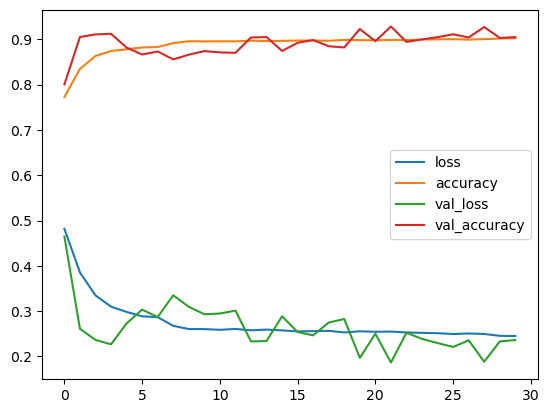

In [34]:
pd.DataFrame(history_1bl_1GRU.history).plot()

Normalized confusion matrix


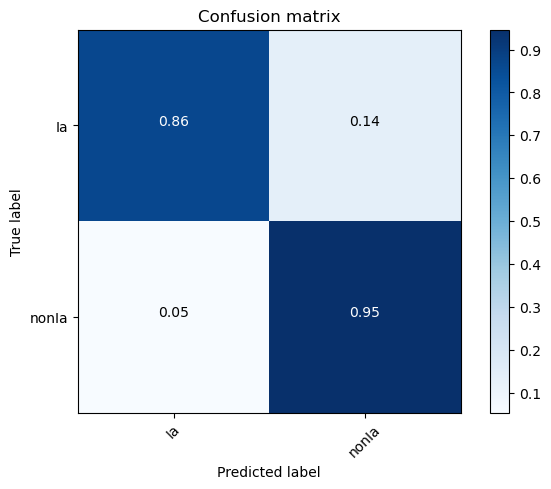

In [35]:
plot_confusion_matrix(y_test, predict_1bl_1GRU.round(), ['Ia', 'nonIa'], normalize=True)

AUC = 0.9047267438222111


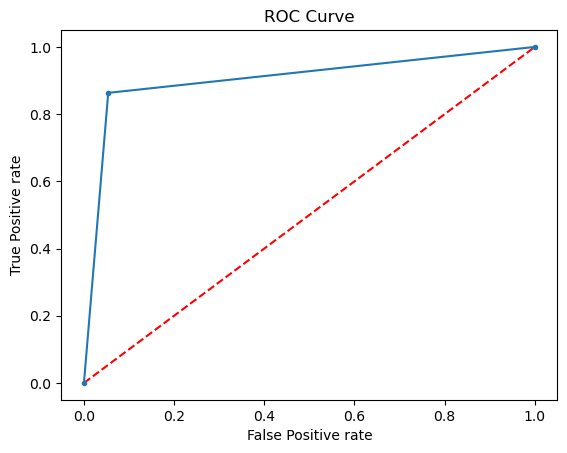

In [36]:
plot_roc_curve(y_test, predict_1bl_1GRU.round(), auc_print=True)

In [37]:
acc_1bl_1GRU = model_1bl_1GRU.evaluate(X_test, y_test, verbose=0)
print(f'accuracy: {acc_1bl_1GRU[1] * 100 : 0.2f}%')

accuracy:  90.49%


## Results

- LSTM & GRU: accuracy improve using bidirectional layer

  - LSTM: 94% Ia - 98% NonIa
  - GRU: 98% Ia - 94% NonIa

# Model: 1 bidirectional layer & 4 neurons
---

## LSTM 


In [38]:
model_1bl_4LSTM = Sequential()
model_1bl_4LSTM.add(Bidirectional(LSTM(4, return_sequences=True, dropout=0.2),
                                  input_shape=(seq_len, feat)))
model_1bl_4LSTM.add(BatchNormalization())
model_1bl_4LSTM.add(Flatten())
model_1bl_4LSTM.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam()
model_1bl_4LSTM.compile(loss='binary_crossentropy',
                       optimizer=optimizer,
                       metrics=['accuracy'])
model_1bl_4LSTM.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 100, 8)           320       
 nal)                                                            
                                                                 
 batch_normalization_5 (Batc  (None, 100, 8)           32        
 hNormalization)                                                 
                                                                 
 flatten_5 (Flatten)         (None, 800)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 801       
                                                                 
Total params: 1,153
Trainable params: 1,137
Non-trainable params: 16
_________________________________________________________________


In [39]:
history_1bl_4LSTM = model_1bl_4LSTM.fit(X_train, y_train,
                                     validation_data=(X_test, y_test),
                                     epochs=30, batch_size=128)
predict_1bl_4LSTM = model_1bl_4LSTM.predict(X_test)

Epoch 1/30
1085/1085 [==============================] - 30s 25ms/step - loss: 0.2773 - accuracy: 0.8840 - val_loss: 0.1899 - val_accuracy: 0.9291
Epoch 2/30
1085/1085 [==============================] - 28s 25ms/step - loss: 0.1432 - accuracy: 0.9511 - val_loss: 0.1354 - val_accuracy: 0.9547
Epoch 3/30
1085/1085 [==============================] - 27s 25ms/step - loss: 0.1239 - accuracy: 0.9587 - val_loss: 0.1182 - val_accuracy: 0.9599
Epoch 4/30
1085/1085 [==============================] - 28s 26ms/step - loss: 0.1171 - accuracy: 0.9606 - val_loss: 0.0970 - val_accuracy: 0.9680
Epoch 5/30
1085/1085 [==============================] - 29s 26ms/step - loss: 0.1110 - accuracy: 0.9619 - val_loss: 0.1128 - val_accuracy: 0.9620
Epoch 6/30
1085/1085 [==============================] - 29s 27ms/step - loss: 0.1076 - accuracy: 0.9633 - val_loss: 0.0850 - val_accuracy: 0.9712
Epoch 7/30
1085/1085 [==============================] - 29s 26ms/step - loss: 0.1045 - accuracy: 0.9647 - val_loss: 0.0949 -

<AxesSubplot:>

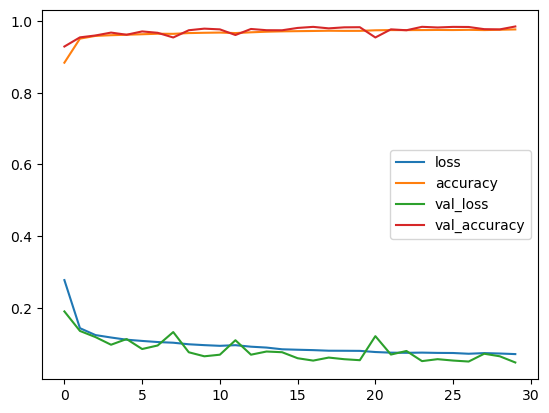

In [40]:
pd.DataFrame(history_1bl_4LSTM.history).plot()

Normalized confusion matrix


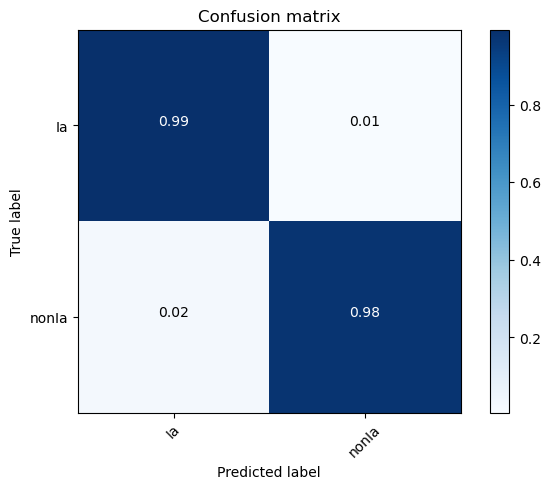

In [41]:
plot_confusion_matrix(y_test, predict_1bl_4LSTM.round(), ['Ia', 'nonIa'], normalize=True)

AUC = 0.9850498660533578


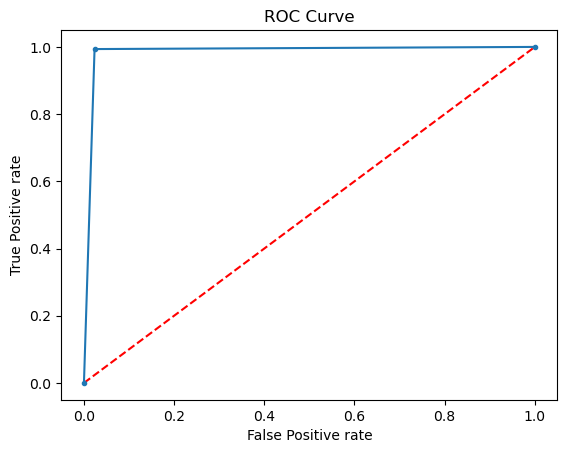

In [42]:
plot_roc_curve(y_test, predict_1bl_4LSTM.round(), auc_print=True)

In [43]:
acc_1bl_4LSTM = model_1bl_4LSTM.evaluate(X_test, y_test, verbose=0)
print(f'accuracy: {acc_1bl_4LSTM[1] * 100 : 0.2f}%')

accuracy:  98.50%


## GRU

In [44]:
model_1bl_4GRU = Sequential()
model_1bl_4GRU.add(Bidirectional(GRU(4, return_sequences=True, dropout=0.2),
                                 input_shape=(seq_len, feat)))
model_1bl_4GRU.add(BatchNormalization())
model_1bl_4GRU.add(Flatten())
model_1bl_4GRU.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam()
model_1bl_4GRU.compile(loss='binary_crossentropy',
                      optimizer=optimizer,
                      metrics=['accuracy'])
model_1bl_4GRU.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirectio  (None, 100, 8)           264       
 nal)                                                            
                                                                 
 batch_normalization_6 (Batc  (None, 100, 8)           32        
 hNormalization)                                                 
                                                                 
 flatten_6 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 801       
                                                                 
Total params: 1,097
Trainable params: 1,081
Non-trainable params: 16
_________________________________________________________________


In [45]:
history_1bl_4GRU = model_1bl_4GRU.fit(X_train, y_train,
                                      validation_data=(X_test, y_test),
                                      epochs=30, batch_size=128)
predict_1bl_4GRU = model_1bl_4GRU.predict(X_test)

Epoch 1/30
1085/1085 [==============================] - 33s 28ms/step - loss: 0.3335 - accuracy: 0.8584 - val_loss: 0.2062 - val_accuracy: 0.9242
Epoch 2/30
1085/1085 [==============================] - 25s 23ms/step - loss: 0.1861 - accuracy: 0.9323 - val_loss: 0.1798 - val_accuracy: 0.9303
Epoch 3/30
1085/1085 [==============================] - 30s 27ms/step - loss: 0.1455 - accuracy: 0.9493 - val_loss: 0.2221 - val_accuracy: 0.9100
Epoch 4/30
1085/1085 [==============================] - 29s 27ms/step - loss: 0.1334 - accuracy: 0.9537 - val_loss: 0.2845 - val_accuracy: 0.8845
Epoch 5/30
1085/1085 [==============================] - 30s 27ms/step - loss: 0.1230 - accuracy: 0.9572 - val_loss: 0.1081 - val_accuracy: 0.9660
Epoch 6/30
1085/1085 [==============================] - 30s 27ms/step - loss: 0.1162 - accuracy: 0.9604 - val_loss: 0.2048 - val_accuracy: 0.9202
Epoch 7/30
1085/1085 [==============================] - 24s 22ms/step - loss: 0.1126 - accuracy: 0.9618 - val_loss: 0.2270 -

<AxesSubplot:>

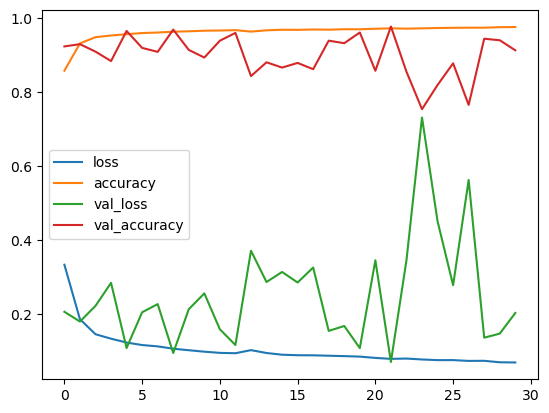

In [46]:
pd.DataFrame(history_1bl_4GRU.history).plot()

Normalized confusion matrix


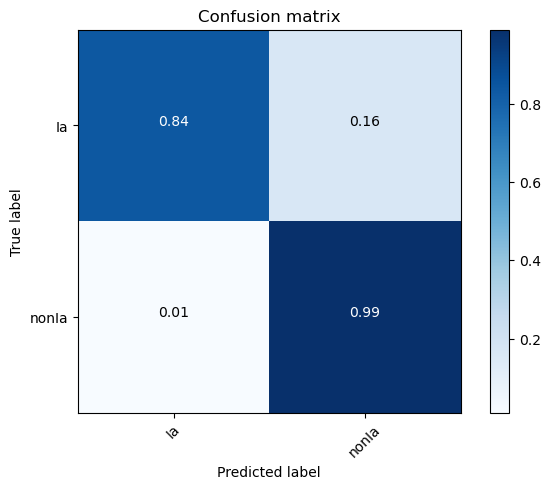

In [47]:
plot_confusion_matrix(y_test, predict_1bl_4GRU.round(), ['Ia', 'nonIa'], normalize=True)

AUC = 0.9134514291533467


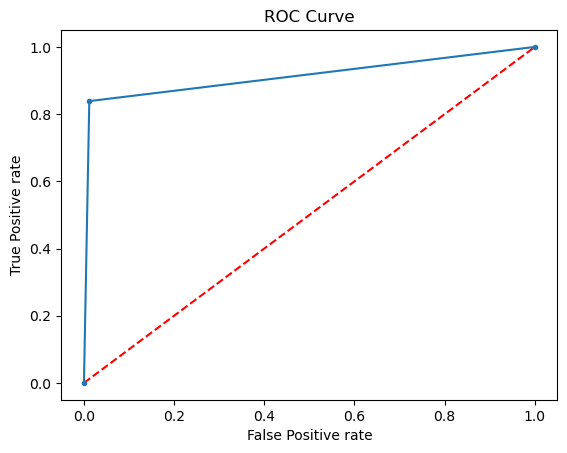

In [48]:
plot_roc_curve(y_test, predict_1bl_4GRU.round(), auc_print=True)

In [49]:
acc_1bl_4GRU = model_1bl_4GRU.evaluate(X_test, y_test, verbose=0)
print(f'accuracy: {acc_1bl_4GRU[1] * 100 : 0.2f}%')

accuracy:  91.37%


# Model: 1 bidirectional layer & 64 neurons
---

## LSTM

In [50]:
model_1bl_64LSTM = Sequential()
model_1bl_64LSTM.add(Bidirectional(LSTM(64, return_sequences=True, dropout=0.2),
                                   input_shape=(seq_len, feat)))
model_1bl_64LSTM.add(BatchNormalization())
model_1bl_64LSTM.add(Flatten())
model_1bl_64LSTM.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam()
model_1bl_64LSTM.compile(loss='binary_crossentropy',
                       optimizer=optimizer,
                       metrics=['accuracy'])
model_1bl_64LSTM.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 100, 128)         35840     
 nal)                                                            
                                                                 
 batch_normalization_7 (Batc  (None, 100, 128)         512       
 hNormalization)                                                 
                                                                 
 flatten_7 (Flatten)         (None, 12800)             0         
                                                                 
 dense_7 (Dense)             (None, 1)                 12801     
                                                                 
Total params: 49,153
Trainable params: 48,897
Non-trainable params: 256
_________________________________________________________________


In [51]:
history_1bl_64LSTM = model_1bl_64LSTM.fit(X_train, y_train,
                                          validation_data=(X_test, y_test),
                                          epochs=30, batch_size=128)
predict_1bl_64LSTM = model_1bl_64LSTM.predict(X_test)

Epoch 1/30
1085/1085 [==============================] - 385s 350ms/step - loss: 0.1291 - accuracy: 0.9551 - val_loss: 0.1147 - val_accuracy: 0.9597
Epoch 2/30
1085/1085 [==============================] - 344s 318ms/step - loss: 0.0857 - accuracy: 0.9717 - val_loss: 0.1194 - val_accuracy: 0.9583
Epoch 3/30
1085/1085 [==============================] - 351s 323ms/step - loss: 0.0718 - accuracy: 0.9766 - val_loss: 0.1964 - val_accuracy: 0.9270
Epoch 4/30
1085/1085 [==============================] - 820s 756ms/step - loss: 0.0659 - accuracy: 0.9785 - val_loss: 0.2750 - val_accuracy: 0.8945
Epoch 5/30
1085/1085 [==============================] - 379s 350ms/step - loss: 0.0621 - accuracy: 0.9803 - val_loss: 0.0723 - val_accuracy: 0.9753
Epoch 6/30
1085/1085 [==============================] - 402s 371ms/step - loss: 0.0578 - accuracy: 0.9811 - val_loss: 0.1884 - val_accuracy: 0.9348
Epoch 7/30
1085/1085 [==============================] - 425s 391ms/step - loss: 0.0533 - accuracy: 0.9823 - val_

<AxesSubplot:>

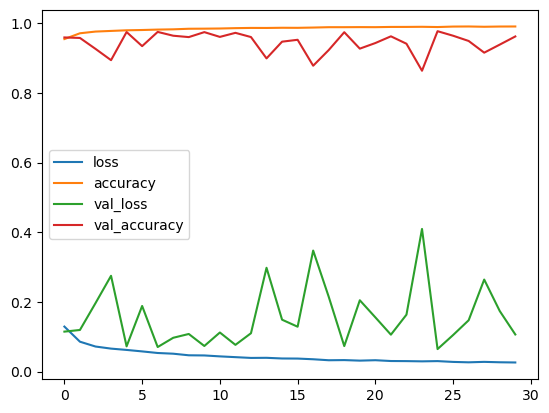

In [52]:
pd.DataFrame(history_1bl_64LSTM.history).plot()

Normalized confusion matrix


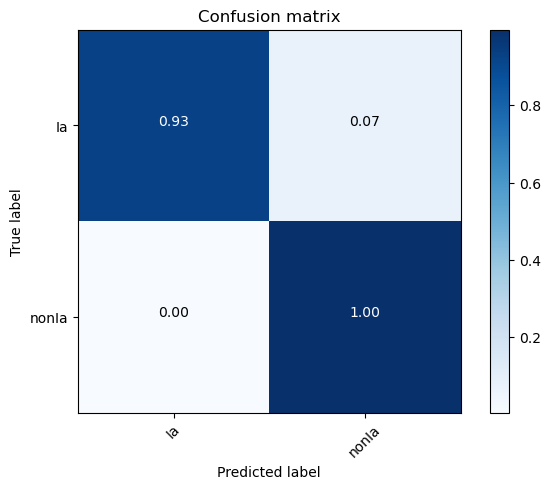

In [53]:
plot_confusion_matrix(y_test, predict_1bl_64LSTM.round(), ['Ia', 'nonIa'], normalize=True)

AUC = 0.9624687591526082


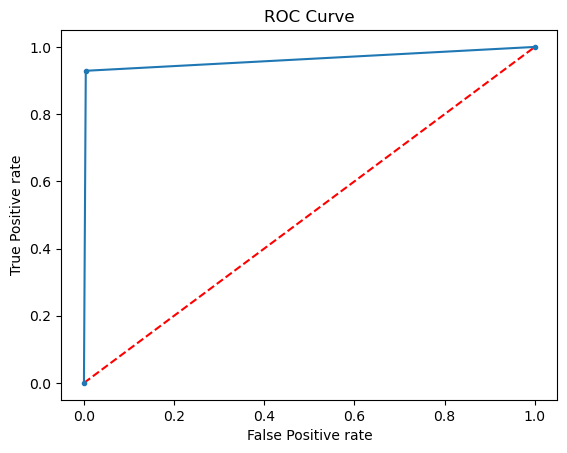

In [54]:
plot_roc_curve(y_test, predict_1bl_64LSTM.round(), auc_print=True)

In [55]:
acc_1bl_64LSTM = model_1bl_64LSTM.evaluate(X_test, y_test, verbose=0)
print(f'accuracy: {acc_1bl_64LSTM[1] * 100 : 0.2f}%')

accuracy:  96.26%


## GRU

In [56]:
model_1bl_64GRU = Sequential()
model_1bl_64GRU.add(Bidirectional(GRU(64, return_sequences=True, dropout=0.2),
                                  input_shape=(seq_len, feat)))
model_1bl_64GRU.add(BatchNormalization())
model_1bl_64GRU.add(Flatten())
model_1bl_64GRU.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam()
model_1bl_64GRU.compile(loss='binary_crossentropy',
                        optimizer=optimizer,
                        metrics=['accuracy'])
model_1bl_64GRU.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_5 (Bidirectio  (None, 100, 128)         27264     
 nal)                                                            
                                                                 
 batch_normalization_8 (Batc  (None, 100, 128)         512       
 hNormalization)                                                 
                                                                 
 flatten_8 (Flatten)         (None, 12800)             0         
                                                                 
 dense_8 (Dense)             (None, 1)                 12801     
                                                                 
Total params: 40,577
Trainable params: 40,321
Non-trainable params: 256
_________________________________________________________________


In [57]:
history_1bl_64GRU = model_1bl_64GRU.fit(X_train, y_train,
                                        validation_data=(X_test, y_test),
                                        epochs=30, batch_size=128)
predict_1bl_64GRU = model_1bl_64GRU.predict(X_test)

Epoch 1/30
1085/1085 [==============================] - 250s 228ms/step - loss: 0.1364 - accuracy: 0.9513 - val_loss: 0.2245 - val_accuracy: 0.9148
Epoch 2/30
1085/1085 [==============================] - 249s 229ms/step - loss: 0.0824 - accuracy: 0.9726 - val_loss: 0.0952 - val_accuracy: 0.9660
Epoch 3/30
1085/1085 [==============================] - 240s 221ms/step - loss: 0.0698 - accuracy: 0.9773 - val_loss: 0.1262 - val_accuracy: 0.9549
Epoch 4/30
  29/1085 [..............................] - ETA: 3:12 - loss: 0.0616 - accuracy: 0.9787

<Axes: >

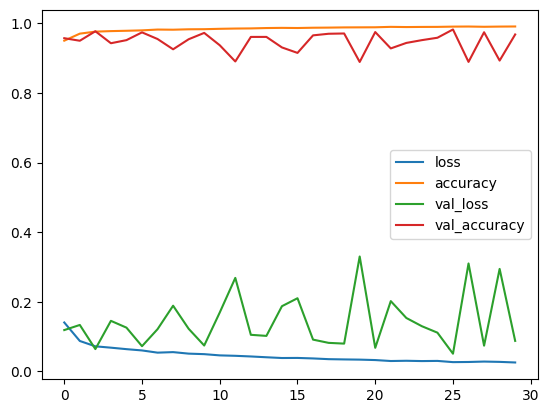

In [ ]:
pd.DataFrame(history_1bl_64GRU.history).plot()

Normalized confusion matrix


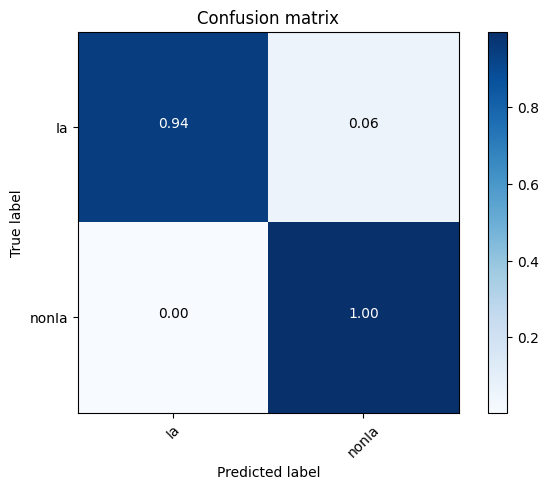

In [ ]:
plot_confusion_matrix(y_test, predict_1bl_64GRU.round(), ['Ia', 'nonIa'], normalize=True)

AUC = 0.9680319945954755


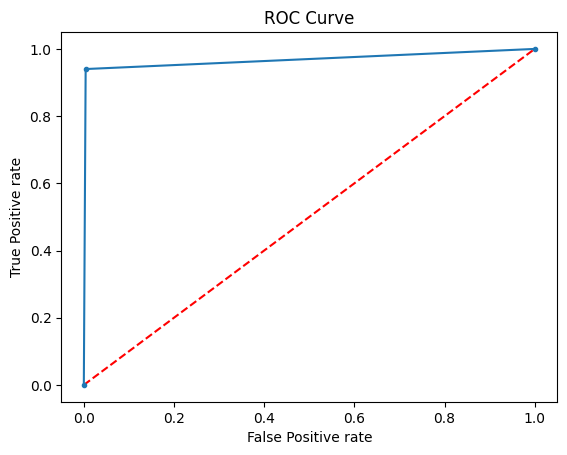

In [ ]:
plot_roc_curve(y_test, predict_1bl_64GRU.round(), auc_print=True)

In [ ]:
acc_1bl_64GRU = model_1bl_64GRU.evaluate(X_test, y_test, verbose=0)
print(f'accuracy: {acc_1bl_64GRU[1] * 100 : 0.2f}%')

accuracy:  96.81%


# Model: 2 bidirectional layer & 4 neurons
---
- 2 per layer

## LSTM

In [ ]:
model_2bl_4LSTM = Sequential()
model_2bl_4LSTM.add(Bidirectional(LSTM(2, return_sequences=True, dropout=0.2),
                                  input_shape=(seq_len, feat)))
model_2bl_4LSTM.add(BatchNormalization())

model_2bl_4LSTM.add(Bidirectional(LSTM(2, return_sequences=True, dropout=0.2),
                                  input_shape=(seq_len, feat)))
model_2bl_4LSTM.add(Flatten())
model_2bl_4LSTM.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam()
model_2bl_4LSTM.compile(loss='binary_crossentropy',
                       optimizer=optimizer,
                       metrics=['accuracy'])
model_2bl_4LSTM.summary()

In [ ]:
history_2bl_4LSTM = model_2bl_4LSTM.fit(X_train, y_train,
                                      validation_data=(X_test, y_test),
                                      epochs=30, batch_size=128)
predict_2bl_4LSTM = model_2bl_4LSTM.predict(X_test)

Epoch 1/30
1085/1085 [==============================] - 33s 24ms/step - loss: 0.3735 - accuracy: 0.8267 - val_loss: 0.1978 - val_accuracy: 0.9224
Epoch 2/30
1085/1085 [==============================] - 27s 25ms/step - loss: 0.2085 - accuracy: 0.9187 - val_loss: 0.1409 - val_accuracy: 0.9497
Epoch 3/30
1085/1085 [==============================] - 23s 22ms/step - loss: 0.1775 - accuracy: 0.9336 - val_loss: 0.1208 - val_accuracy: 0.9643
Epoch 4/30
1085/1085 [==============================] - 24s 22ms/step - loss: 0.1623 - accuracy: 0.9392 - val_loss: 0.1039 - val_accuracy: 0.9672
Epoch 5/30
1085/1085 [==============================] - 26s 24ms/step - loss: 0.1532 - accuracy: 0.9434 - val_loss: 0.1027 - val_accuracy: 0.9677
Epoch 6/30
1085/1085 [==============================] - 26s 24ms/step - loss: 0.1478 - accuracy: 0.9460 - val_loss: 0.1235 - val_accuracy: 0.9565
Epoch 7/30
1085/1085 [==============================] - 24s 22ms/step - loss: 0.1377 - accuracy: 0.9494 - val_loss: 0.1062 -

<Axes: >

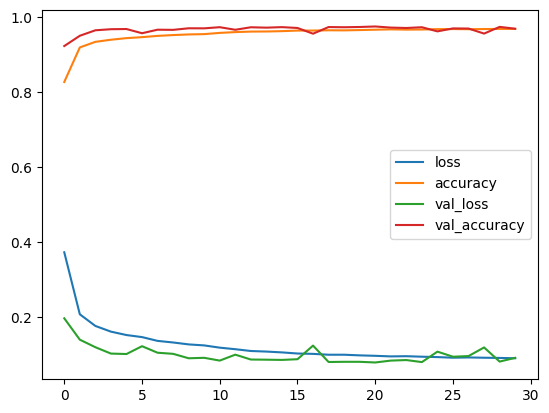

In [ ]:
pd.DataFrame(history_2bl_4LSTM.history).plot()

Normalized confusion matrix


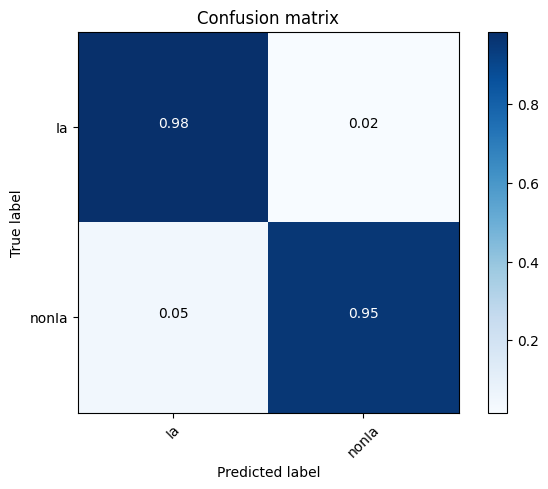

In [ ]:
plot_confusion_matrix(y_test, predict_2bl_4LSTM.round(), ['Ia', 'nonIa'], normalize=True)

In [ ]:
plot_roc_curve(y_test, predict_2bl_4LSTM.round(), auc_print=True)

In [ ]:
acc_2bl_4LSTM = model_2bl_4LSTM.evaluate(X_test, y_test, verbose=0)
print(f'accuracy: {acc_2bll_4LSTM[1] * 100 : 0.2f}%')

## GRU

In [ ]:
model_2bl_4GRU= Sequential()
model_2bl_4GRU.add(Bidirectional(GRU(2, return_sequences=True, dropout=0.2),
                                 input_shape=(seq_len, feat)))
model_2bl_4GRU.add(BatchNormalization())

model_2bl_4GRU.add(Bidirectional(GRU(2, return_sequences=True, dropout=0.2),
                                 input_shape=(seq_len, feat)))
model_2bl_4GRU.add(Flatten())
model_2bl_4GRU.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam()
model_2bl_4GRU.compile(loss='binary_crossentropy',
                       optimizer=optimizer,
                       metrics=['accuracy'])
model_2bl_4GRU.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 100, 4)           108       
 nal)                                                            
                                                                 
 batch_normalization_8 (Batc  (None, 100, 4)           16        
 hNormalization)                                                 
                                                                 
 bidirectional_7 (Bidirectio  (None, 100, 4)           96        
 nal)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 400)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 401       
                                                      

In [ ]:
history_2bl_4GRU= model_2bl_4GRU.fit(X_train, y_train,
                                     validation_data=(X_test, y_test),
                                     epochs=30, batch_size=128)
predict_2bl_4GRU = model_2bl_4GRU.predict(X_test)

Epoch 1/30
1085/1085 [==============================] - 34s 24ms/step - loss: 0.4547 - accuracy: 0.7824 - val_loss: 0.4703 - val_accuracy: 0.7775
Epoch 2/30
1085/1085 [==============================] - 25s 23ms/step - loss: 0.2931 - accuracy: 0.8795 - val_loss: 0.3957 - val_accuracy: 0.8256
Epoch 3/30
1085/1085 [==============================] - 27s 25ms/step - loss: 0.2420 - accuracy: 0.9038 - val_loss: 0.2734 - val_accuracy: 0.8953
Epoch 4/30
1085/1085 [==============================] - 27s 25ms/step - loss: 0.2178 - accuracy: 0.9156 - val_loss: 0.2254 - val_accuracy: 0.9131
Epoch 5/30
1085/1085 [==============================] - 27s 25ms/step - loss: 0.2025 - accuracy: 0.9224 - val_loss: 0.1813 - val_accuracy: 0.9332
Epoch 6/30
1085/1085 [==============================] - 25s 23ms/step - loss: 0.1914 - accuracy: 0.9271 - val_loss: 0.1849 - val_accuracy: 0.9333
Epoch 7/30
1085/1085 [==============================] - 27s 25ms/step - loss: 0.1851 - accuracy: 0.9299 - val_loss: 0.2345 -

<Axes: >

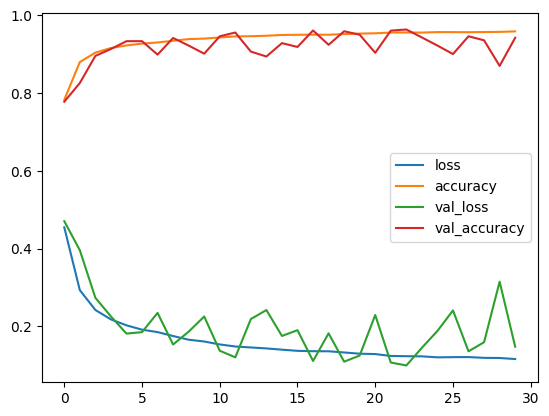

In [ ]:
pd.DataFrame(history_2bl_4GRU.history).plot()

Normalized confusion matrix


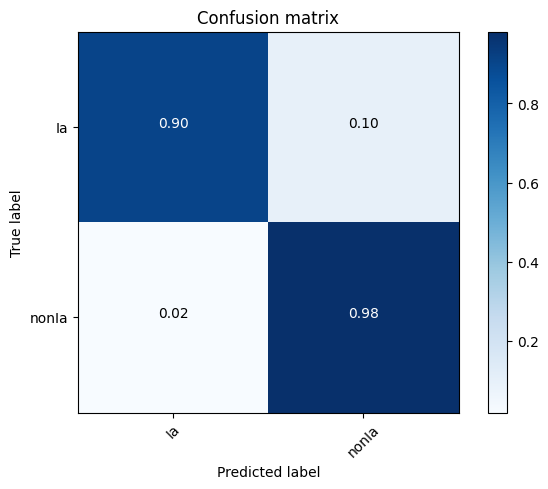

In [ ]:
plot_confusion_matrix(y_test, predict_2bl_4GRU.round(), ['Ia', 'nonIa'], normalize=True)

In [ ]:
plot_roc_curve(y_test, predict_2bl_4GRU.round(), auc_print=True)

In [ ]:
acc_2bl_4GRU = model_2bl_4GRU.evaluate(X_test, y_test, verbose=0)
print(f'accuracy: {acc_2bl_4GRU[1] * 100 : 0.2f}%')